In [41]:
import sys
sys.path.append('/home/swang597/Documents/Research/Project_heightmap/Utility_projHM')
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

from datetime import date
import glob

from PIL import Image
import cv2
# torch.manual_seed(1)
np.random.seed(1)

In [42]:
initX= 4 #-23
# NNF_testNNI with SCM reset
# foldername = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNINNF/DEMO_OUTPUT/Hybrid_fixW_NNINNF_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'
# NNF_testNNI without SCM reset
# foldername = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNINNF/DEMO_OUTPUT/Hybrid_fixW_NNINNF_noResetImg_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'

# CNNF_CNNIuseGRF without SCM reset
foldername = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_CNNF_CNNIuseGRF/DEMO_OUTPUT/Hybrid_fixW_CNNF_testCNNIuseGRF_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'

# foldername = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNIGeoI/DEMO_OUTPUT/Hybrid_fixW_NNF_testGeoI_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000_HMbmp/'
# foldername = f'/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_NNIGeoI/DEMO_OUTPUT/Hybrid_fixW_NNFGeoI_dt0.005000_terrGrid0.005000terrX{initX}.000000terrH-1.000000normLoad1000.000000/'
# 

foldername_SCM_HM = foldername
foldername_ML_HM = foldername[:-1] + '_HMbmp/'

filename_wheelstate = foldername + 'ROVER_states_saved.txt'
filename_force = foldername + 'SCM_force_saved.txt'

data_wheelstate = np.loadtxt(filename_wheelstate)
data_force = np.loadtxt(filename_force)


In [43]:
# filename_HM_global = foldername_ML_HM + 'NN_HM_global.txt'
# data_HM_global = np.loadtxt(filename_HM_global)
# print("data_HM_global", data_HM_global.shape)

# heightmap_file = "/home/swang597/Documents/Research/chrono_fork_radu/build/data/vehicle/terrain/height_maps/terrain_heightmap_smooth_horizontal_terrGrid0.005_wx50_wy1.bmp"
# #plot the heightmap
# hm = plt.imread(heightmap_file)
# hm = hm/255*0.1
# print("hm",hm.shape)

# time = 0.05
# I00_file = foldername_SCM_HM + f'hmap_Pat{time:.6f}_Tat{time:.6f}.txt'
# I00 = np.loadtxt(I00_file)
# print("I00",I00.shape)


# figure, ax = plt.subplots(1,2, figsize=(10,5))
# ax[0].plot(data_HM_global[:,1]-1)
# ax[0].plot(hm[0,:]-1, linestyle='--')
# ax[0].plot([x for x in range(9558,9654)],I00[:,1], linestyle=':')
# ax[0].set_xlim(9560,9656)
# ax[0].set_ylim(-0.98,-0.93)
# ax[0].grid()

# ax[1].plot(I00[:,1])
# ax[1].set_ylim(-0.98,-0.93)
# ax[1].grid()


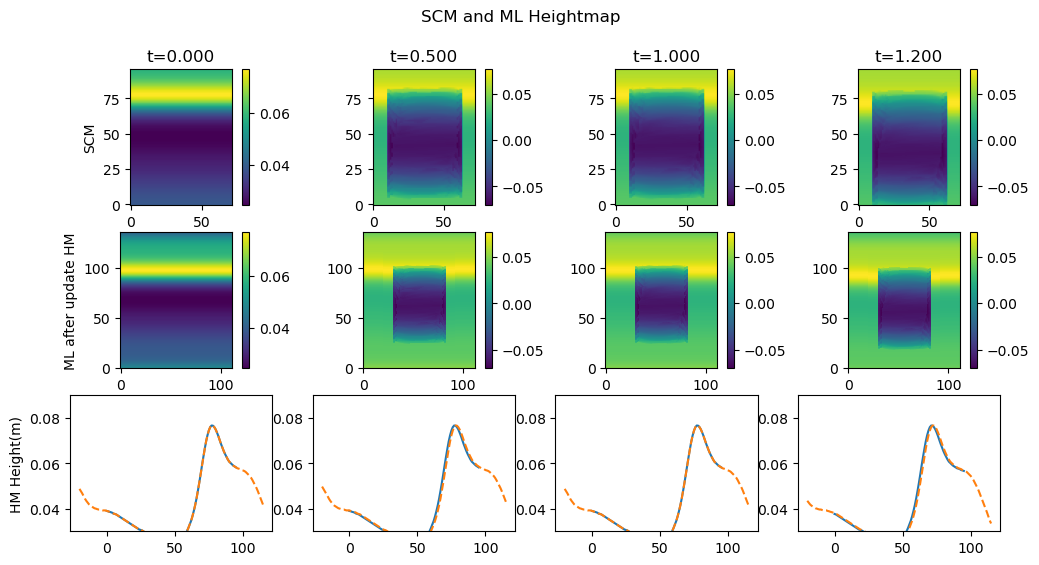

In [44]:
# plot img as 2-by-4 subplots
ncols = 4
fig, axs = plt.subplots(3, ncols, figsize=(12, 6))
fig.suptitle('SCM and ML Heightmap')
time_list = [0,0.5,1.0,1.2]
for iax in range(len(time_list)):
    time = time_list[iax]
    # print(time)
    filename_SCM_HM = foldername_SCM_HM + f'hmap_Pat{time:.6f}_Tat{time:.6f}.txt'
    # filename_ML_HM_in = foldername_ML_HM + f'NN_Iin_Tat{time:.6f}.txt'
    filename_ML_HM_out = foldername_ML_HM + f'NN_Iout_Tat{time:.6f}.txt'
    # print(filename_SCM_HM[-50:])
    # print(filename_ML_HM_in[-50:])
    data_SCM_HM = np.loadtxt(filename_SCM_HM) -(-1)
    # data_ML_HM_in = np.loadtxt(filename_ML_HM_in) 
    data_ML_HM_out = np.loadtxt(filename_ML_HM_out) 
    vmin = data_SCM_HM.min()
    vmax = data_SCM_HM.max()
    im0 = axs[0, iax].imshow(data_SCM_HM, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    im1 = axs[1, iax].imshow(data_ML_HM_out, origin='lower', cmap='viridis')#, vmin=vmin, vmax=vmax)
    axs[2, iax].plot([x for x in range(96)],data_SCM_HM[:,0])
    axs[2, iax].plot([x-20 for x in range(data_ML_HM_out.shape[0])], data_ML_HM_out[:,0], linestyle='--')
    axs[-1, iax].set_ylim(0.03,0.09)
    axs[0, iax].set_title(f't={time:.3f}')
    fig.colorbar(im0, ax=axs[0, iax])
    fig.colorbar(im1, ax=axs[1, iax])
axs[0, 0].set_ylabel('SCM')
axs[1, 0].set_ylabel('ML after update HM')
axs[2, 0].set_ylabel('HM Height(m)')
plt.show()



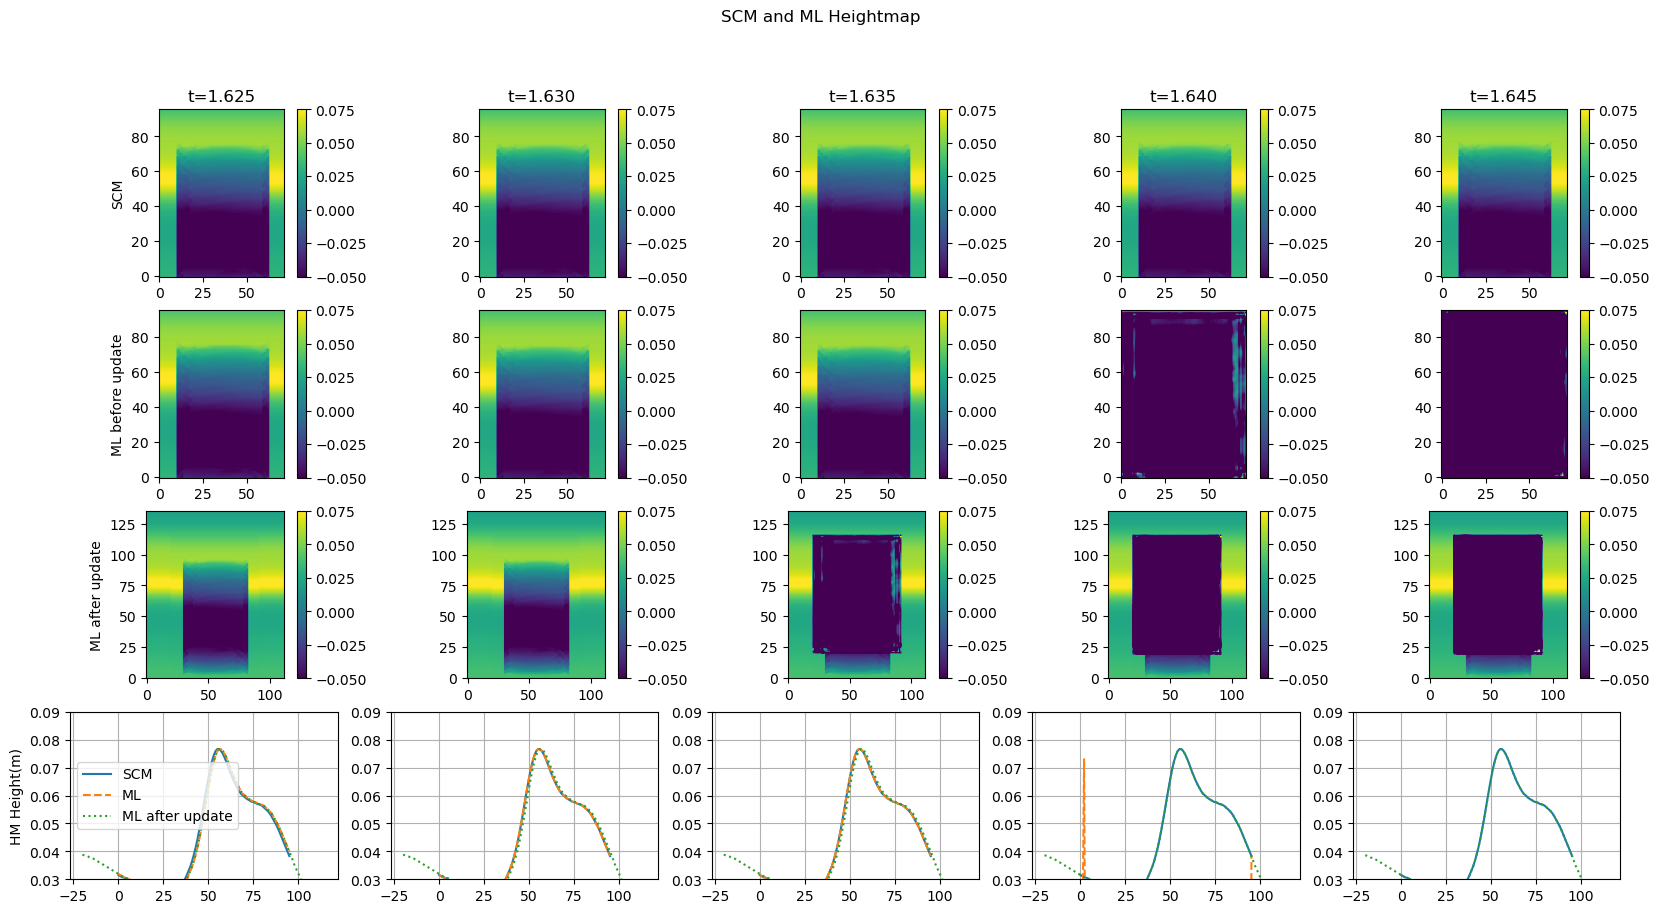

In [59]:
# plot img as 2-by-4 subplots
time_list = [x*0.005+1.63-0.005 for x in range(5)] #[1.497,1.50, 1.505,1.51]#[1.497, 1.50,1.51,1.52] #
fig, axs = plt.subplots(4, len(time_list), figsize=(20, 10))
fig.suptitle('SCM and ML Heightmap')

for iax in range(len(time_list)):
    time = time_list[iax]
    # print(time)
    filename_SCM_HM = foldername_SCM_HM + f'hmap_Pat{time:.6f}_Tat{time:.6f}.txt'
    filename_ML_HM_in = foldername_ML_HM + f'NN_Iin_Tat{time:.6f}.txt'
    filename_ML_HM_out = foldername_ML_HM + f'NN_Iout_Tat{time:.6f}.txt'
    # print(filename_SCM_HM[-50:])
    # print(filename_ML_HM_in[-50:])
    data_SCM_HM = np.loadtxt(filename_SCM_HM) -(-1)
    data_ML_HM_in = np.loadtxt(filename_ML_HM_in) 
    data_ML_HM_out = np.loadtxt(filename_ML_HM_out) 
    vmin = -0.05 # min(data_SCM_HM.min(), data_ML_HM_in.min())
    vmax = 0.075# max(data_SCM_HM.max(), data_ML_HM_in.max())
    im0 = axs[0, iax].imshow(data_SCM_HM, origin='lower',cmap='viridis', vmin=vmin, vmax=vmax)
    im1 = axs[1, iax].imshow(data_ML_HM_in,origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    im2 = axs[2, iax].imshow(data_ML_HM_out,origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    axs[-1, iax].plot([x for x in range(96)],data_SCM_HM[:,0], label='SCM')
    axs[-1, iax].plot([x for x in range(96)], data_ML_HM_in[:,0], linestyle='--', label='ML')
    axs[-1, iax].plot([x-20 for x in range(data_ML_HM_out.shape[0])], data_ML_HM_out[:,0], linestyle=':', label='ML after update')
    axs[-1, iax].set_ylim(0.03,0.09)
    
    axs[-1,iax].grid()
    axs[0, iax].set_title(f't={time:.3f}')
    fig.colorbar(im0, ax=axs[0, iax])
    fig.colorbar(im1, ax=axs[1, iax])
    fig.colorbar(im2, ax=axs[2, iax])
axs[0, 0].set_ylabel('SCM')
axs[1, 0].set_ylabel('ML before update')
axs[2, 0].set_ylabel('ML after update')
axs[-1, 0].set_ylabel('HM Height(m)')
axs[-1, 0].legend()
plt.show()



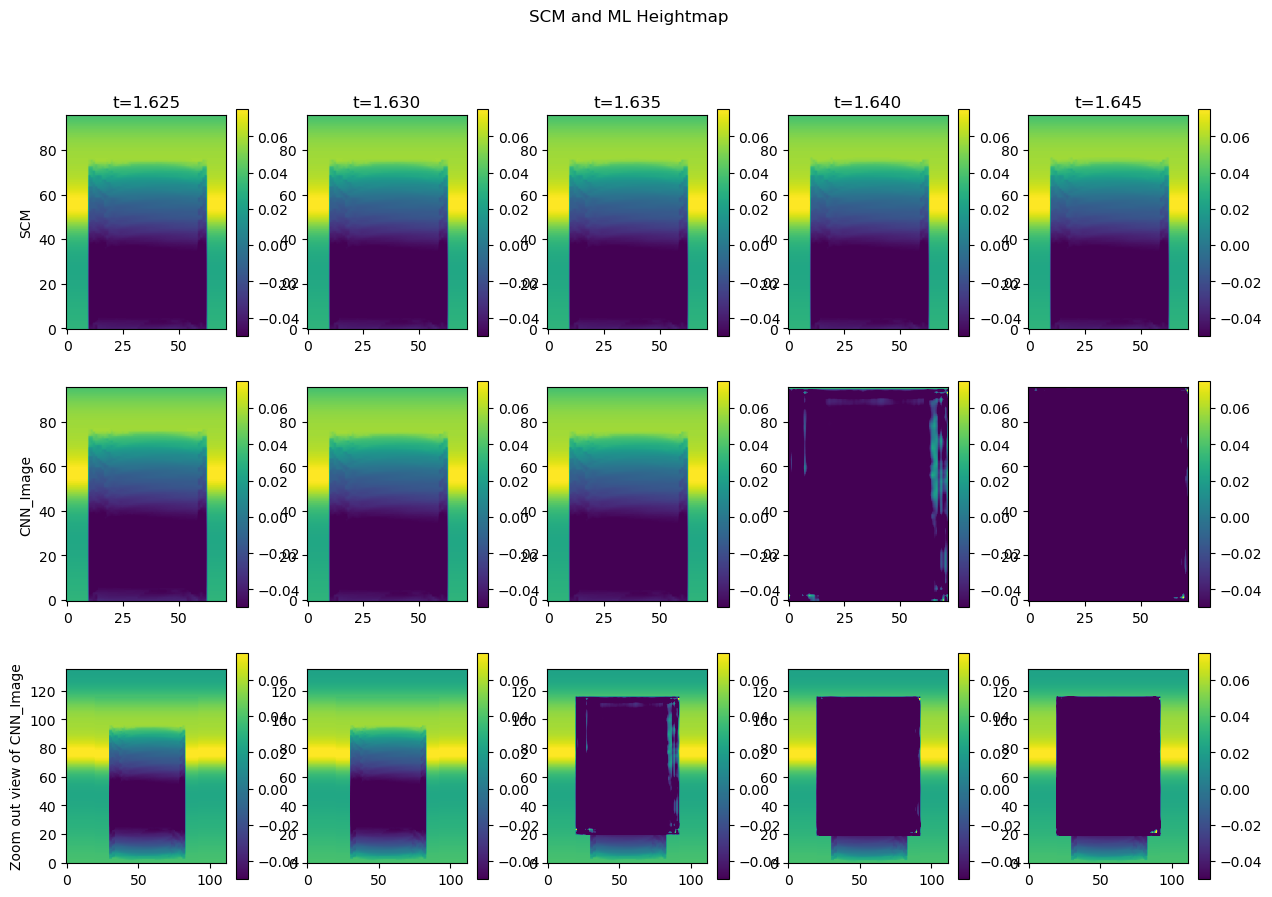

In [58]:
# plot img as 2-by-4 subplots
time_list = [x*0.005+1.63-0.005 for x in range(5)] #[1.497,1.50, 1.505,1.51]#[1.497, 1.50,1.51,1.52] #
# time_list = [1.5,2,2.5,3]
fig, axs = plt.subplots(3, len(time_list), figsize=(15, 10))
fig.suptitle('SCM and ML Heightmap')

for iax in range(len(time_list)):
    time = time_list[iax]
    # print(time)
    filename_SCM_HM = foldername_SCM_HM + f'hmap_Pat{time:.6f}_Tat{time:.6f}.txt'
    filename_ML_HM_in = foldername_ML_HM + f'NN_Iin_Tat{time:.6f}.txt'
    filename_ML_HM_out = foldername_ML_HM + f'NN_Iout_Tat{time:.6f}.txt'
    # print(filename_SCM_HM[-50:])
    # print(filename_ML_HM_in[-50:])
    data_SCM_HM = np.loadtxt(filename_SCM_HM) -(-1)
    data_ML_HM_in = np.loadtxt(filename_ML_HM_in) 
    data_ML_HM_out = np.loadtxt(filename_ML_HM_out) 
    vmin = -0.05 # min(data_SCM_HM.min(), data_ML_HM_in.min())
    vmax = 0.075# max(data_SCM_HM.max(), data_ML_HM_in.max())
    im0 = axs[0, iax].imshow(data_SCM_HM, origin='lower',cmap='viridis', vmin=vmin, vmax=vmax)
    im1 = axs[1, iax].imshow(data_ML_HM_in,origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    im2 = axs[2, iax].imshow(data_ML_HM_out,origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    # axs[-1, iax].plot([x for x in range(96)],data_SCM_HM[:,0], label='SCM')
    # axs[-1, iax].plot([x for x in range(96)], data_ML_HM_in[:,0], linestyle='--', label='ML')
    # axs[-1, iax].plot([x-20 for x in range(data_ML_HM_out.shape[0])], data_ML_HM_out[:,0], linestyle=':', label='ML after update')
    # axs[-1, iax].set_ylim(0.03,0.09)
    
    # axs[-1,iax].grid()
    axs[0, iax].set_title(f't={time:.3f}')
    fig.colorbar(im0, ax=axs[0, iax])
    fig.colorbar(im1, ax=axs[1, iax])
    fig.colorbar(im2, ax=axs[2, iax])
axs[0, 0].set_ylabel('SCM')
axs[1, 0].set_ylabel('CNN_Image')
axs[2, 0].set_ylabel('Zoom out view of CNN_Image') #ML after update
# axs[-1, 0].set_ylabel('HM Height(m)')
# axs[-1, 0].legend()
plt.show()



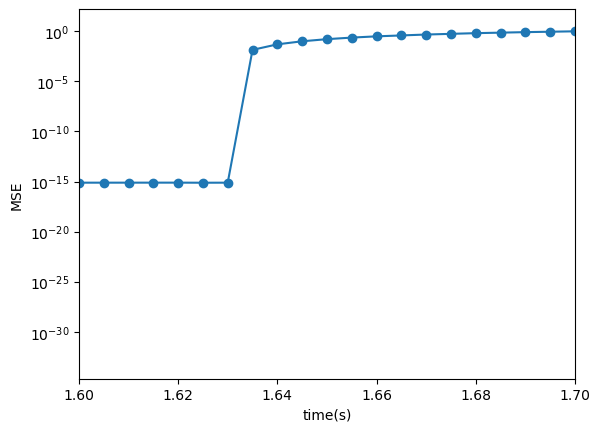

In [57]:
# mean square error between SCM and ML
mse_list, time_list = [], []
for i in range(0,int(3.0/0.005),1):
    time = i*0.005
    filename_SCM_HM = foldername_SCM_HM + f'hmap_Pat{time:.6f}_Tat{time:.6f}.txt'
    filename_ML_HM_in = foldername_ML_HM + f'NN_Iin_Tat{time:.6f}.txt'
    filename_ML_HM_out = foldername_ML_HM + f'NN_Iout_Tat{time:.6f}.txt'
    data_SCM_HM = np.loadtxt(filename_SCM_HM) -(-1)
    data_ML_HM_in = np.loadtxt(filename_ML_HM_in) 
    data_ML_HM_out = np.loadtxt(filename_ML_HM_out) 
    mse_in = np.mean((data_SCM_HM - data_ML_HM_in)**2)
    mse_out = np.mean((data_SCM_HM - data_ML_HM_out[20:-20, 20:-20])**2)
    # mse_list.append(mse_in)
    mse_list.append(mse_out)
    time_list.append(time)
time_list = np.array(time_list)
mse_list = np.array(mse_list)
plt.figure()
plt.plot(time_list, mse_list, marker='o')
plt.xlabel('time(s)')
plt.ylabel('MSE')
plt.xlim(1.6,1.7)
# plt.ylim(1e-7,1e-2)
# y log scale
plt.yscale('log')

# generate the heightmap video

    

In [48]:
def create_colored_heightmap(filename_txt, filename_img, title=None, colormap='viridis'):
    # Load the heightmap from the text file
    heightmap = np.loadtxt(filename_txt)

    # Define a color map - you can choose different color maps
    # colormap = plt.cm.terrain  # Other options: plt.cm.jet, plt.cm.viridis, etc.

    # Create the figure and axis for the plot
    fig, ax = plt.subplots()

    # Plot the heightmap with specified color range
    cax = ax.imshow(heightmap, cmap=colormap,origin='lower')#, vmin=-0.02, vmax=0.1)
    # add title
    if title is not None:
        ax.set_title(title)

    # Optional: Add a color bar
    fig.colorbar(cax)

    # Save the figure
    plt.savefig(filename_img)
    plt.close(fig)

In [54]:
from PIL import Image
import cv2

img_folder = foldername[:-1] + '_img/'
if not os.path.exists(img_folder):
    os.makedirs(img_folder)
image_files = []
for i in range(int(1.65/0.005),int(3.0/0.005),1):
    time = i*0.005
    # filename_SCM_HM = foldername_SCM_HM + f'hmap_Pat{time:.6f}_Tat{time:.6f}.txt'
    # filename_ML_HM_in = foldername_ML_HM + f'NN_Iin_Tat{time:.6f}.txt'
    filename_ML_HM_out = foldername_ML_HM + f'NN_Iout_Tat{time:.6f}.txt'
    # data_SCM_HM = np.loadtxt(filename_SCM_HM) -(-1)
    # data_ML_HM_in = np.loadtxt(filename_ML_HM_in) 
    data_ML_HM_out = np.loadtxt(filename_ML_HM_out) 
    image_file = img_folder + f'NN_Iout_Tat{time:.6f}.png'
    create_colored_heightmap(filename_ML_HM_out, image_file, title=f't={time:.3f}')
    image_files.append(image_file)

video_name = img_folder + 'video_HM.mp4'
frame = cv2.imread(image_files[0])
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 5, (width, height))
for image in image_files:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()
print(f'Video saved as {video_name}')


Video saved as /home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML_CNNF_CNNIuseGRF/DEMO_OUTPUT/Hybrid_fixW_CNNF_testCNNIuseGRF_dt0.005000_terrGrid0.005000terrX4.000000terrH-1.000000normLoad1000.000000_img/video_HM.mp4


rmLoad1000.000000/hmap_Pat0.000000_Tat0.000000.txt
00normLoad1000.000000_HMbmp/NN_Iin_Tat0.000000.txt
0normLoad1000.000000_HMbmp/NN_Iout_Tat0.000000.txt
(96, 72)
(96, 72)


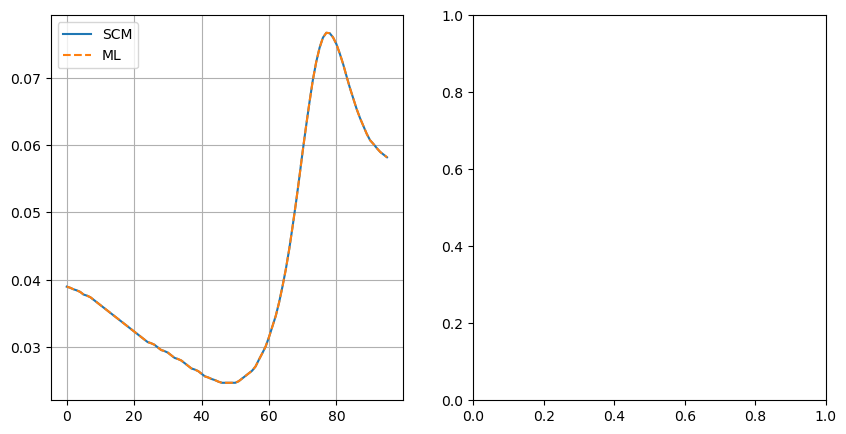

In [ ]:
time = 0 #0.05
dt = 0#0.0005 *100
filename_SCM_HM = foldername_SCM_HM + f'hmap_Pat{time+dt:.6f}_Tat{time+dt:.6f}.txt'
filename_ML_HM_in = foldername_ML_HM + f'NN_Iin_Tat{time:.6f}.txt'
filename_ML_HM_out = foldername_ML_HM + f'NN_Iout_Tat{time:.6f}.txt'
print(filename_SCM_HM[-50:])
print(filename_ML_HM_in[-50:])
print(filename_ML_HM_out[-50:])
data_SCM_HM = np.loadtxt(filename_SCM_HM)  -(-1)
data_ML_HM = np.loadtxt(filename_ML_HM_in) 
# data_ML_pos = np.loadtxt(foldername_ML_HM + f'NN_Iin_Tat{time:.6f}_pos.txt')
# print(data_ML_pos)
print(data_SCM_HM.shape)
print(data_ML_HM.shape)
# plot
figure, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot([x for x in range(96)],data_SCM_HM[:,0], label='SCM')
ax[0].plot([x for x in range(96)], data_ML_HM[:,0], linestyle='--', label='ML')
ax[0].legend()
# ax[0].plot([x for x in range(9558,9654)],I00[:,1], linestyle=':')
# ax[0].set_xlim(9560,9656)
# ax[0].set_ylim(-0.98,-0.93)
ax[0].grid()


In [ ]:
print(hm)

NameError: name 'hm' is not defined

NameError: name 'data_SCM_wheelstate' is not defined

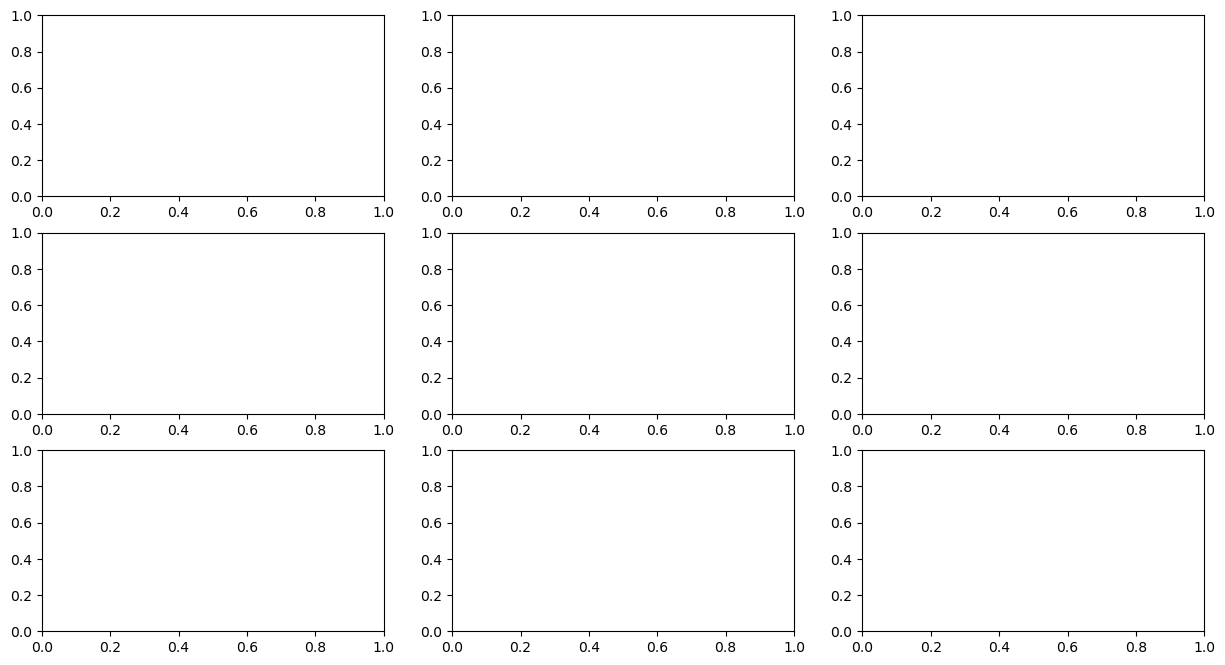

In [ ]:
# plot wheel state
ylabel_list = ['x','y','z','Vx', 'Vy', 'Vz', 'Wx', 'Wy', 'Wz']
idx_list = [    1,2,3,      8,9,10,           11,12,13]

fig, ax = plt.subplots(3, 3, figsize=(5*3, 8))
for iax in range(len(ylabel_list)):
    ax[iax//3, iax%3].plot(data_SCM_wheelstate[:, 0], data_SCM_wheelstate[:, idx_list[iax]],label='SCM')
    ax[iax//3, iax%3].plot(data_Hyb_wheelstate[:, 0], data_Hyb_wheelstate[:, idx_list[iax]], label='Hybrid',linestyle='--')
    # ax[iax//3, iax%3].plot(data_SCM_Hyb_0TerrF[:, 0], data_SCM_Hyb_0TerrF[:, iax+1], label='SCM_Hyb_0TerrF',linestyle=':')
    ax[iax//3, iax%3].set_xlabel('time')
    ax[iax//3, iax%3].set_ylabel(ylabel_list[iax])
    ax[iax//3, iax%3].legend()


NameError: name 'data_SCM_force' is not defined

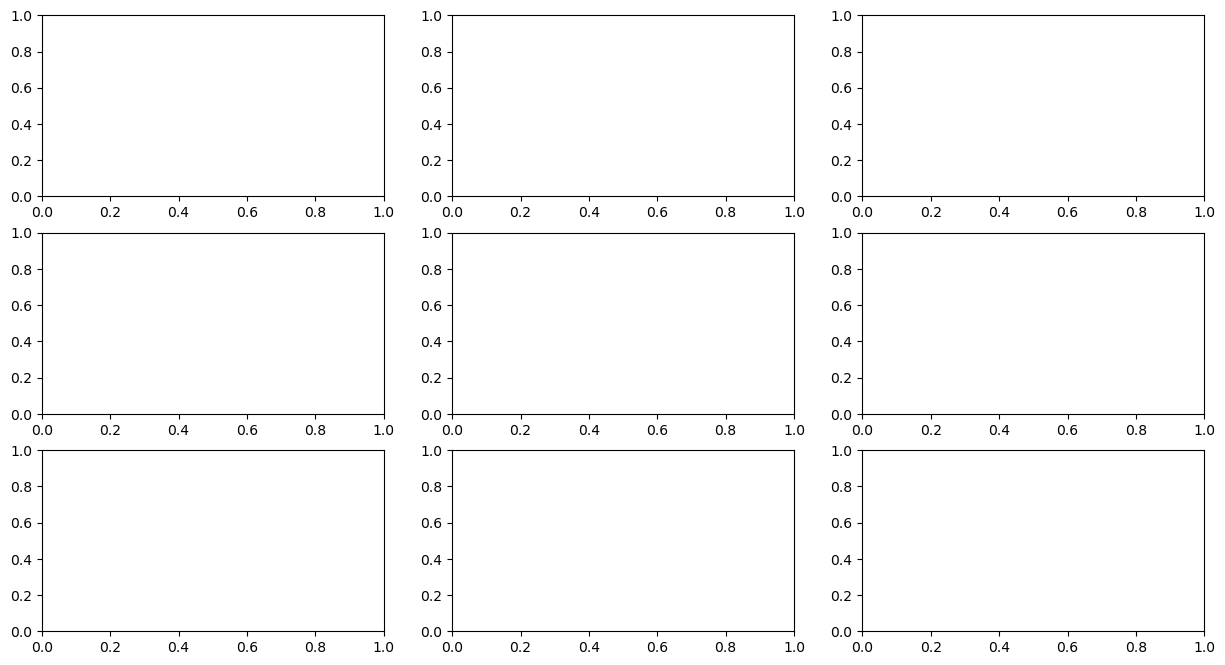

In [ ]:
# plot the data with respect to time as subplot
F_list = ['x','y','z','Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz']
fig, ax = plt.subplots(3, 3, figsize=(5*3, 8))
for iax in range(len(F_list)):
    ax[iax//3, iax%3].plot(data_SCM_force[:, 0], data_SCM_force[:, iax+1], label='SCM')
    ax[iax//3, iax%3].plot(data_Hyb_force[:, 0], data_Hyb_force[:, iax+1], label='SCM_Hyb',linestyle='--')
    # ax[iax//3, iax%3].plot(data_SCM_Hyb_0TerrF[:, 0], data_SCM_Hyb_0TerrF[:, iax+1], label='SCM_Hyb_0TerrF',linestyle=':')
    ax[iax//3, iax%3].set_xlabel('time')
    ax[iax//3, iax%3].set_ylabel(F_list[iax])
    ax[iax//3, iax%3].legend()


In [ ]:
# # find at which index data_SCM[:,1] > 1.0
# # idx = np.where(data_SCM[:,1] > 1.0)[0][0]
# # print('idx = ', idx, 'x=', data_SCM[idx,1],'time = ', data_SCM[idx,0])
# # find at which index data_SCM[:,0] > 1.5
# idx = np.where(data_SCM[:,0] >= 1.5)[0][0]
# print('idx = ', idx, 'time = ', data_SCM[idx,0], 'x=', data_SCM[idx,1])
# print('idx-1 = ', idx-1, 'time = ', data_SCM[idx-1,0], 'x=', data_SCM[idx-1,1])

NameError: name 'data_SCM' is not defined

(2179, 3)
(0,)


(-200.0, 100.0)

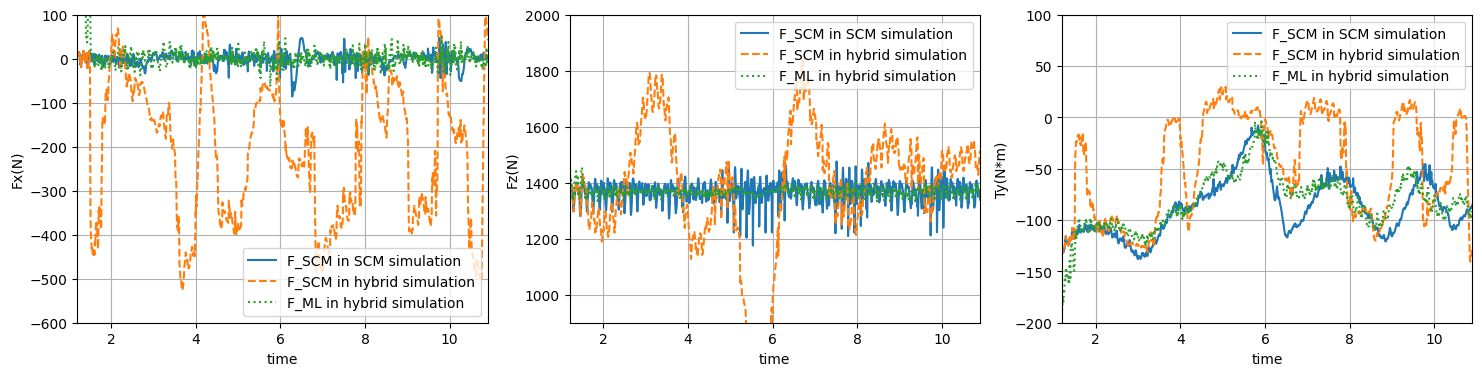

In [ ]:
time_tot =10.9 #2.95 #1.51#
dt = 5e-4
dump_dt = dt*10
F_Hyb, time_Hyb = [], []
F_Hyb_0TerrF = []
for i in range(1, round(time_tot/dump_dt)):
    itime = i*dump_dt
    filename_F = foldername_Hyb_HM + f'F_t{itime:6f}.txt'
    data = np.loadtxt(filename_F)
    # print(data)
    if any(np.isnan(data)):
        continue
    F_Hyb.append(data)
    time_Hyb.append(itime)
    # data_0TerrF = np.loadtxt(foldername_Hyb_0TerrF_HM + f'F_t{itime:6f}.txt')
    # F_Hyb_0TerrF.append(data_0TerrF)
    
F_Hyb = np.array(F_Hyb)
time_Hyb = np.array(time_Hyb)
F_Hyb_0TerrF = np.array(F_Hyb_0TerrF)
print(F_Hyb.shape)
print(F_Hyb_0TerrF.shape)

# polt time_Hyb vs F_Hyb
F_list_Hmap = ['Fx(N)', 'Fz(N)', 'Ty(N*m)']
F_SCM_idx = [4, 6, 8]
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for iax in range(len(F_list_Hmap)):
    ax[iax].plot(data_SCM_force[:, 0], data_SCM_force[:, F_SCM_idx[iax]], label='F_SCM in SCM simulation')
    ax[iax].plot(data_Hyb_force[:, 0], data_Hyb_force[:, F_SCM_idx[iax]],linestyle='--', label='F_SCM in hybrid simulation')
    ax[iax].plot(time_Hyb, F_Hyb[:, iax], linestyle=':',label='F_ML in hybrid simulation')
    # ax[iax].plot(time_Hyb, F_Hyb_0TerrF[:, iax], label='ML_0TerrF',linestyle='-.')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(F_list_Hmap[iax])
    ax[iax].legend()
    ax[iax].grid()
    ax[iax].set_xlim(1.2, time_Hyb[-1])
ax[0].set_ylim(-600, 100)
ax[1].set_ylim(900, 2000)
ax[2].set_ylim(-200, 100)


(2179, 3)


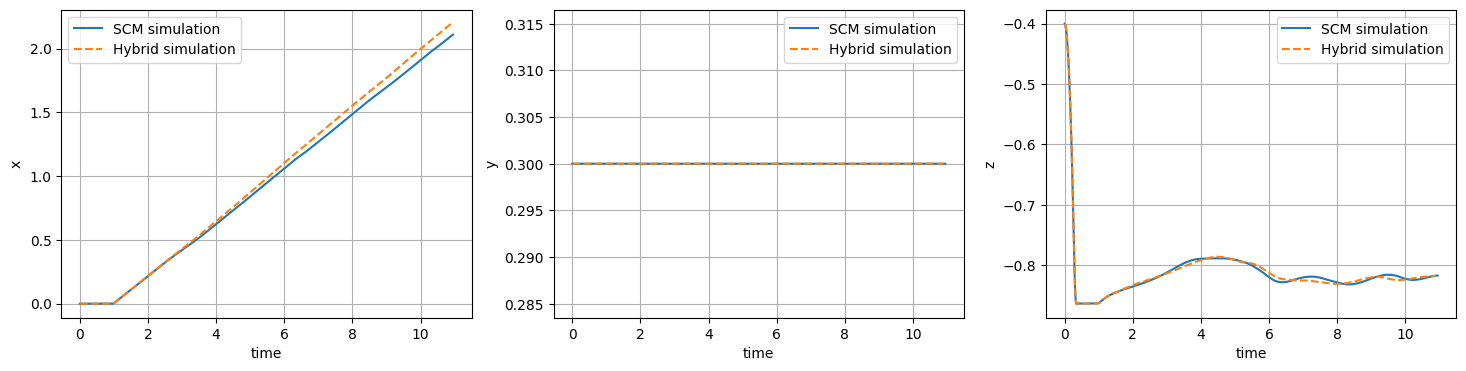

In [ ]:
X_Hyb, time_Hyb = [], []
for i in range(1, round(time_tot/dump_dt)):
    itime = i*dump_dt
    filename_X = foldername_Hyb_HM + f'xyz_t{itime:6f}.txt'
    data = np.loadtxt(filename_X)
    # print(data)
    if any(np.isnan(data)):
        continue
    X_Hyb.append(data)
    time_Hyb.append(itime)
X_Hyb = np.array(X_Hyb)
time_Hyb = np.array(time_Hyb)
print(X_Hyb.shape)

# polt time_Hyb vs F_Hyb
X_list_Hmap = ['x', 'y', 'z']
F_SCM_idx = [1,2,3]
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for iax in range(len(X_list_Hmap)):
    ax[iax].plot(data_SCM_force[:, 0], data_SCM_force[:, F_SCM_idx[iax]], label='SCM simulation')
    ax[iax].plot(time_Hyb, X_Hyb[:, iax], linestyle='--', label='Hybrid simulation')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(X_list_Hmap[iax])
    ax[iax].legend()
    ax[iax].grid()
    # ax[iax].set_xlim(1.2, 3)
# ax[0].set_ylim(-600, 100)
# ax[1].set_ylim(0.3-1e-4, 0.301)
# ax[2].set_ylim(-0.84,-0.8)



(2179, 3)
(2179, 3)


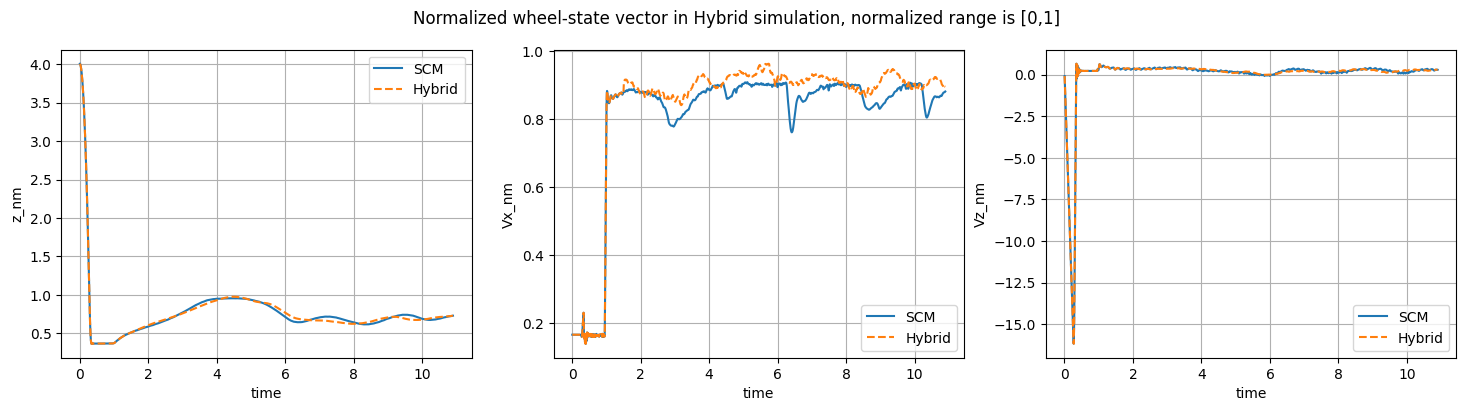

In [ ]:
Vecnm_hyb, time_hyb = [], []
Vecnm_SCM, time_SCM = [], []
F_SCM = []

for i in range(1, round(time_tot/dump_dt)):
    itime = i*dump_dt
    filename_Vecnm_hyb = foldername_Hyb_HM + f'Vecnm_t{itime:6f}.txt'
    data_Hyb_i = np.loadtxt(filename_Vecnm_hyb)
    # print(data)
    if any(np.isnan(data_Hyb_i)):
        continue
    Vecnm_hyb.append(data_Hyb_i)
    time_hyb.append(itime)

    filename_Vecnm_SCM = foldername_SCM_HM + f'Vecnm_t{itime:6f}.txt'
    data_SCM_i = np.loadtxt(filename_Vecnm_SCM)
    # print(data)
    if any(np.isnan(data_SCM_i)):
        continue
    Vecnm_SCM.append(data_SCM_i)
    time_SCM.append(itime)

    filename_F_SCM = foldername_SCM_HM + f'F_t{itime:6f}.txt'
    data_SCM_i = np.loadtxt(filename_F_SCM)
    # print(data)
    if any(np.isnan(data_SCM_i)):
        continue
    F_SCM.append(data_SCM_i)



Vecnm_hyb = np.array(Vecnm_hyb)
time_hyb = np.array(time_Hyb)
Vecnm_SCM = np.array(Vecnm_SCM)
time_SCM = np.array(time_SCM)
F_SCM = np.array(F_SCM)
print(Vecnm_hyb.shape)

# polt time_Hyb vs F_Hyb
Vecnm_hyb_list = ['z_nm', 'Vx_nm', 'Vz_nm']
fig, ax = plt.subplots(1, len(Vecnm_hyb_list), figsize=(18, 4))
fig.suptitle('Normalized wheel-state vector in Hybrid simulation, normalized range is [0,1]')
for iax in range(len(Vecnm_hyb_list)):    
    ax[iax].plot(time_SCM, Vecnm_SCM[:, iax], label='SCM')    
    ax[iax].plot(time_hyb, Vecnm_hyb[:, iax], linestyle='--', label='Hybrid')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(Vecnm_hyb_list[iax])
    ax[iax].legend()
    ax[iax].grid()
    # ax[iax].set_xlim(0, data_SCM[-1,0])
print(F_SCM.shape)


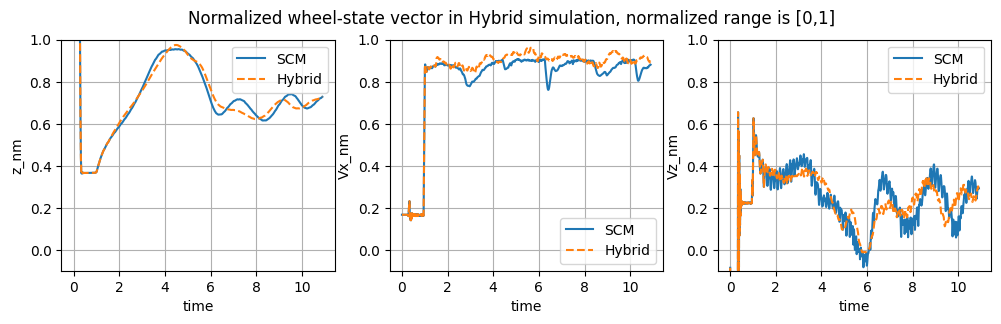

In [ ]:
Vecnm_hyb_list = ['z_nm', 'Vx_nm','Vz_nm']
Vecnm_hyb_list_idx = [0, 1, 2]
fig, ax = plt.subplots(1, len(Vecnm_hyb_list), figsize=(12, 3))
fig.suptitle('Normalized wheel-state vector in Hybrid simulation, normalized range is [0,1]')
for iax in range(len(Vecnm_hyb_list)):    
    ax[iax].plot(time_hyb, Vecnm_SCM[:, Vecnm_hyb_list_idx[iax]], linestyle='-', label='SCM')
    ax[iax].plot(time_hyb, Vecnm_hyb[:, Vecnm_hyb_list_idx[iax]], linestyle='--', label='Hybrid')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(Vecnm_hyb_list[iax])
    ax[iax].legend()

    ax[iax].set_ylim(-0.1, 1)
    ax[iax].grid()


In [ ]:
# find at which index Vecnm_hyb[:,1] != Vecnm_SCM[:,1]
idx = np.where(Vecnm_hyb[:,1] != Vecnm_SCM[:,1])
print('idx = ', idx, 'time = ', time_hyb[idx], 'Vecnm_hyb = ', Vecnm_hyb[idx,1], 'Vecnm_SCM = ', Vecnm_SCM[idx,1])

idx =  (array([ 299,  300,  301, ..., 2176, 2177, 2178]),) time =  [ 1.5    1.505  1.51  ... 10.885 10.89  10.895] Vecnm_hyb =  [[0.880322 0.893745 0.9032   ... 0.895955 0.894987 0.894775]] Vecnm_SCM =  [[0.878828 0.879485 0.879826 ... 0.879861 0.880495 0.881008]]


IndexError: index 2 is out of bounds for axis 0 with size 2

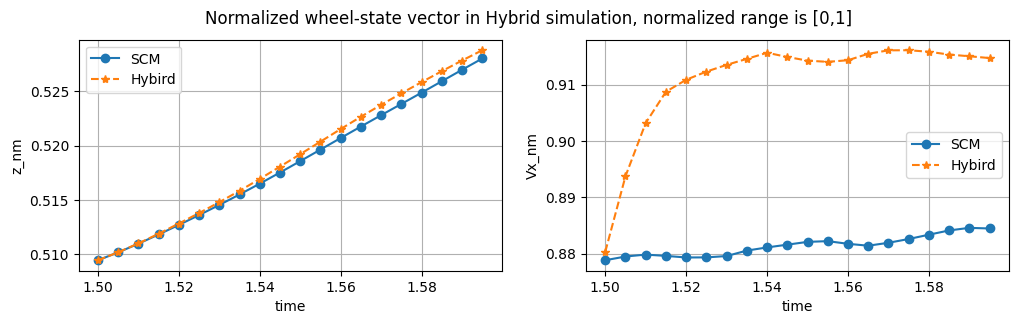

In [ ]:
# find the row idx where the difference is larger than 1e-4
# idx_diff_z = np.where(abs(Vecnm_hyb[:,0] - Vecnm_SCM[:,0]) > 1e-4)[0]
# idx_diff_vz = np.where(abs(Vecnm_hyb[:,2] - Vecnm_SCM[:,2]) > 1e-4)[0]
# # print(idx_diff_z, idx_diff_vz)
# idx_diff = set(idx_diff_z).union(set(idx_diff_vz))
idx_diff = np.union1d(np.where(abs(Vecnm_hyb[:,0] - Vecnm_SCM[:,0]) > 1e-4)[0], np.where(abs(Vecnm_hyb[:,2] - Vecnm_SCM[:,2]) > 1e-4)[0])
# print(idx_diff)
plot_idx = idx_diff[:20]
# print('plot_idx = ', plot_idx)
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
fig.suptitle('Normalized wheel-state vector in Hybrid simulation, normalized range is [0,1]')
for iax in range(len(Vecnm_hyb_list)):    
    ax[iax].plot(time_hyb[plot_idx], Vecnm_SCM[plot_idx, Vecnm_hyb_list_idx[iax]], linestyle='-', marker='o', label='SCM')
    ax[iax].plot(time_hyb[plot_idx], Vecnm_hyb[plot_idx, Vecnm_hyb_list_idx[iax]], linestyle='--', marker='*',label='Hybird')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(Vecnm_hyb_list[iax])
    ax[iax].legend()
    ax[iax].grid()
    # ax[iax].set_xlim(1, 3)
    # ax[iax].set_ylim(-1, 1)



In [ ]:
print(data_SCM_Hyb.shape)
print(F_Hyb.shape)
F_SCM_idx = [4, 6, 8]
idx_start, idx_end = plot_idx[0]-50,plot_idx[0]+20
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
for iax in range(len(F_list_Hmap)):
    ax[iax].plot(data_SCM[idx_start:idx_end, 0], data_SCM[idx_start:idx_end, F_SCM_idx[iax]], label='F_SCM in SCM simulation')
    ax[iax].plot(data_SCM_Hyb[idx_start:idx_end, 0], data_SCM_Hyb[idx_start:idx_end, F_SCM_idx[iax]],linestyle='--', label='F_SCM in hybrid simulation')
    ax[iax].plot(time_Hyb[idx_start:idx_end], F_Hyb[idx_start:idx_end, iax], linestyle=':',label='F_ML in hybrid simulation')
    # ax[iax].plot(time_Hyb, F_Hyb_0TerrF[:, iax], label='ML_0TerrF',linestyle='-.')
    ax[iax].set_xlabel('time')
    ax[iax].set_ylabel(F_list_Hmap[iax])
    ax[iax].legend()
    ax[iax].grid()

NameError: name 'data_SCM_Hyb' is not defined

In [ ]:
print(F_SCM_idx)
print(data_SCM.shape)

[4, 6, 8]
(2191, 10)


In [ ]:
# plot the bmp file
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

filename_bmp = '/home/swang597/Documents/Research/chrono_fork_radu/build/data/vehicle/terrain/height_maps/terrain_heightmap_smooth_horizontal_terrGrid0.005_wx50_wy1.bmp'

# Load the image file
img = Image.open(filename_bmp)  # Make sure to replace 'path_to_your_image.bmp' with your actual file path

# Convert the image to a numpy array (optional, for manipulation if needed)
img_array = np.array(img)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Optional: This removes the axis to display only the image
plt.show()


(200, 10000)


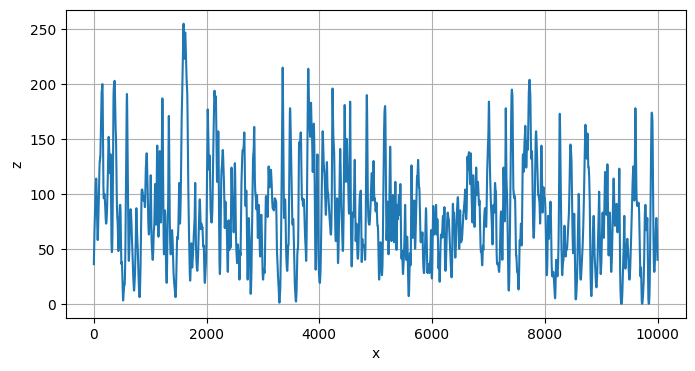

In [ ]:
img_array = np.array(img)
print(img_array.shape)
# plot the img_array[1,:]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(img_array[1,:])
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.grid()
# plt.show()


In [ ]:
import cv2
import os
import glob

# Directory containing images
img_dir = foldername_Hyb_HM  # Enter Directory of all images
data_path = os.path.join(img_dir, '*.jpg')
img_files = glob.glob(data_path)

# Sort the images by name or any criterion you prefer
img_files.sort()

# Frame size
frame_size = (1920, 1080)  # Adjust to match the size of your images

# Output video file
output = f"video_initX{initX}.avi"

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output, fourcc, 20.0, frame_size)

for i in range(len(img_files)):
    img_file = img_dir + f"img_{i}.jpg"
    img = cv2.imread(img_file)
    img = cv2.resize(img, frame_size)
    out.write(img)
    

# for img_file in img_files:
#     img = cv2.imread(img_file)
#     img = cv2.resize(img, frame_size)
#     out.write(img)
#     print(img_file)

out.release()


In [ ]:
print(img_files)

['/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-18.000000terrH-1.000000normLoad1000.000000_HMbmp/img_0.jpg', '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-18.000000terrH-1.000000normLoad1000.000000_HMbmp/img_1.jpg', '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-18.000000terrH-1.000000normLoad1000.000000_HMbmp/img_10.jpg', '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1Chan_dt0.000500_terrGrid0.005000terrX-18.000000terrH-1.000000normLoad1000.000000_HMbmp/img_100.jpg', '/home/swang597/Documents/Research/chrono_fork_rserban/Project_TireTestRig/build_SCM_ML/DEMO_OUTPUT/Hybrid_fixW_onlyNNF1